In [2]:
from visualizer import calibration
#TODO: import from waveorder
import visual 

from PyQt5 import QtCore

from skimage.io import imread
from skimage.io.collection import alphanumeric_key
from dask import delayed
from glob import glob
import dask.array as da
import matplotlib.pyplot as plt
import numpy as np
import napari
from napari import Viewer
import os
import tifffile

from skimage.registration import phase_cross_correlation
import cv2 as cv
from skimage import io
import zarr
import cupy as cp 
# import imagej

%gui qt 
%matplotlib inline
plt.style.use('dark_background')


The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [3]:
# main_folder = r'F:\DATA\20220507_M25_Zw495_9'
# 
# main_folder =r'H:\Test\20220507_M25_ZW495_Egg_Timelapse'  #DIED 
# main_folder =r'F:\DATA\20220507_M25_ZW495_19'   # 5 worm in all FOV and some movement
# main_folder =r'H:\Test\20220507_M25_ZW495_18'  #3 starts in FOV but then moves out
# main_folder =r'H:\Test\20220507_M25_ZW495_17'  # 3 some movement in 3D and some beads are on FOV
# main_folder =r'H:\Test\20220507_M25_ZW495_16'  #3 thicc one with barely any movement
# main_folder =r'H:\Test\20220507_M25_ZW495_15'  #3 just the tail
# main_folder =r'F:\DATA\20220507_M25_ZW495_14' #5 2 worms in FOV.
# main_folder =r'H:\Test\20220507_M25_ZW495_13' #3 movement at the edge
# main_folder =r'H:\Test\20220507_M25_ZW495_12'  #3 not focus on center planes
# main_folder =r'H:\Test\20220507_M25_ZW495_11' #3 not much movement and out of focus on central planes
# main_folder =r'H:\Test\20220507_M25_ZW495_10'  #4 worth taking a look since they move in 3D
# main_folder =r'F:\DATA\20220507_M25_ZW495_9' #5 moves in FOV. Curling up and then shooting out
# main_folder =r'H:\Test\20220507_M25_ZW495_8'  #3 movement out of FOV
# main_folder =r'H:\Test\20220507_M25_ZW495_7'  # 5 lots of worms in FOV coming in and out.
# main_folder =r'F:\DATA\20220507_M25_ZW495_6'  # 5 lots of twitching in FOV
# main_folder =r'H:\Test\20220507_M25_ZW495_5'  #3 out FOV movement
# main_folder =r'H:\Test\20220507_M25_ZW495_4'  #5 amazing movement in 3D
# main_folder =r'F:\DATA\20220507_M25_ZW495_3'  #5 movement in 3D
# main_folder =r'F:\DATA\20220507_M25_ZW495_2'  #5 fast dynamics on second half
# main_folder =r'F:\DATA\20220507_M25_ZW495_1'  #5 fast dynamics of big worm

## Datasets from 05/08
# main_folder = r'H:\ZW495\20220508_M25_zw495_1'
# main_folder = H:\ZW495\20220508_M25_zw495_2
# main_folder = H:\ZW495\20220508_M25_zw495_3
# main_folder = r'H:\ZW495\20220508_M25_zw495_4'  #3 dead floating
# main_folder = r'H:\ZW495\20220508_M25_zw495_6'  #3 moves at the lower side of the FOV
# main_folder = r'H:\ZW495\20220508_M25_zw495_8' # 1 egg sample fluorescence
# main_folder = H:\ZW495\20220508_M25_zw495_9_WL
# main_folder = H:\ZW495\20220508_M25_zw495_10_WL
# main_folder = r'H:\ZW495\20220508_M25_zw495_11'
# main_folder = r'H:\ZW495\20220508_M25_zw495_12' #4 worms in FOV making it hard to analyze but good for dynamics
# main_folder = r'H:\ZW495\20220508_M25_zw495_13' #4 some movement aroudn the FOV. not for analysis
# main_folder = r'H:\ZW495\20220508_M25_zw495_14'  #4 THIS WORM SHOWS THATA MAYBE THERE IS NO CALCIUM ACTIVITY?
# main_folder = r'H:\ZW495\20220508_M25_zw495_15' #5 worth analyzing. does from around the FOV...
# main_folder = r'H:\ZW495\20220508_M25_zw495_17'  #2 no swimming in FOV
# main_folder = r'H:\ZW495\20220508_M25_zw495_18'  #3 Not much movement single worm on the FOV.
# main_folder = r'H:\ZW495\20220508_M25_zw495_19'  #4 Single worm with some movement. For some reason there is a huge shift in z halfway through
# main_folder = r'H:\ZW495\20220508_M25_zw495_20' #3 movement in 3D. oscillates int he z dimension
# main_folder = r'H:\ZW495\20220508_M25_zw495_22' #4 some movement of single worm. not swimming behavior... 
# main_folder = r'H:\ZW495\20220508_M25_zw495_23'  #2 very still worm. not 
# main_folder = r'H:\ZW495\20220508_M25_zw495_24' #2 Z KEEPS SINKING?!
# main_folder = r'H:\ZW495\20220508_M25_zw495_25' #1 unusabel
# main_folder = r'H:\ZW495\20220508_M25_zw495_26'
# main_folder = H:\ZW495\20220508_M25_zw495_27
# main_folder = H:\ZW495\20220508_M25_zw495_28
# main_folder = H:\ZW495\20220508_M25_zw495_29



# main_folder =r'H:\Data\KellerExplant_ian\20220508_M25_Iansample'  #5 fast dynamics of big worm

# main_folder =r'H:\Data\OH15265\20220508_M25_oh15265_1'  #3 first frames are slow
# main_folder =r'H:\Data\OH15265\20220508_M25_oh15265_1'   #5 fast dynamics of big worm
# main_folder =r'H:\Data\OH15265\20220508_M25_oh15265_1'   #5 fast dynamics of big worm
# main_folder =r'H:\Data\OH15265\20220508_M25_oh15265_1'  #5 fast dynamics of big worm
# main_folder =r'H:\Data\OH15265\20220508_M25_oh15265_1'   #5 fast dynamics of big worm


# main_folder='F:\DATA\20220504_M25_celegansOH_late2'

### OH15265 WORMS
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_1' #2 Nothign in plane. Good for Background Subtractiong?

# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_2' #3 fast and dynamic but goes out of FOV a lot
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_3' #5 head of worm is not moving much. good for neuro
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_4' #5 great movement in 3D and across FOV
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_5' # *** Are we photobleaching?
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_7' #3 at the edge of FOV comes in and out of FOV
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_8' #5 3 worms in FOV. good for 3D neuro
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_9' #3 very bright worm laying in Z. some dynamics.
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_10' #5 starts with worm in FOV. Shoots out off FOV fast
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_11' #3 two worms. no moving..
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_12' #4 curled up. not much movement.
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_13' #5 in FOV, some dynamic. good signal
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_14' #5 Very FAST dynamic inside FOV for most capture.
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_16' #5 curled up L2. Good for neural segmentation.not much movement
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_17' #5 some moving in center of FOV. makes a V shape
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_18' #5 amazing moving in 3D. worm is acros the FOV horizontally which works for all planes.
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_19' #4 curled up head of worm. good signal.
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_20' #4 good swimming. unfortunately goes to lower FOV and one cam crops that field.
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_21' #3 noisy
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_22' #5 L2 moving. Lots of dynamics in FOV. amazing signal
# main_folder =r'E:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_23' #5 L1 moving! amazing neurons.
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_24' #3 barely in FOV
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_25' #4 worm flat on z so hard to tell
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_27' #5 if we want tos how multiple curled up worms
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_28' #4 most worms leave the FOV
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_29' #5 lots of dynamics of single worm!!
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_30' #3 lots of worms and 3D dynamics not sure for analysis..
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_31' #5 adult worm. half body. nerons bright and big
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_32' #5 whole worm in FOV. some movement!

# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_33'   #3 good signal no movement.
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_34' # 3 dynamics of worm spazing in 3D
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_35' # 5 good 3D and movement
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_36' #5 great signal and movement in 3D
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_37'  #5 great 3D and whole worm in FOV
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_38' #3 multiple worms in FOV
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_39' #4 many worms in FOV. challenging for gracking?
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_40' #5 good for neural analysis . good signal
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_41' #5 good for neural analysis . good signal
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_42' #4 WF imaging of worms
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_43' #4 good for neural analysis . good signal
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_45' #5 fast 3D movements. good signal
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_46' #5 a little high on FOV but good signal
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_47' #5 half of the body is in. Worth doing analysis?
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_48' #3 exists the FOV
# main_folder =r'F:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_49' #3 very noisy. moves in 3D
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_50' #5 great to see all the neurons.
# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_51' #5 movement and then curl up
main_folder = r'H:\ZW495\20220508_M25_zw495_29'


# main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_40' #5 good for neural analysis . good signal


#Scope Parameters
# FOV = 50e-6
cam_px = 6.0e-6
totalmag = 15.75
px_size_img = cam_px/totalmag
zstep = 2e-6
z_scale = zstep/px_size_img

print(px_size_img)
print(zstep/cam_px)
print(z_scale)


# center_planes = calibration.lazy_dask_stack(main_folder,num_cams=5,px_depth='uint16', height=608, width =608)
# # center_planes = calibration.lazy_dask_stack(main_folder,num_cams=3,px_depth='uint8', height=608, width =608)

# napari.view_image(center_planes, name='center_planes',scale=[z_scale,1,1],multiscale=False)



##LOADING DATSET
# stack = calibration.lazy_dask_stack(main_folder,num_cams=25,px_depth='uint8', height=600, width =960)
stack = calibration.lazy_dask_stack(main_folder,num_cams=25,px_depth='uint16', height=608, width =608)

## LOADING OFFSET
# Load offsets from desired folder 
processed_files = main_folder + '/'+'processed_files'
if not os.path.exists(processed_files):
    os.makedirs(processed_files)

main_folder_offset = r'D:\Data\MBL_ED_ANTONE\PSF\200nm\220508_380nmSteps_minusplus_reversed_1'
offsets_file_load = os.path.join(main_folder_offset,"offsets.csv")
with open(offsets_file_load) as file_name:
    offsets = np.loadtxt(file_name, delimiter=",")


### BG SUBTRACTION
#TODO: get background images of the whole sensor not just the croped region and at 16 bit
###Enter the filepath for background images
bg_dir = r'F:\Test_ignore\20220513_M25_bg_16bit'
bg_stack = calibration.lazy_dask_stack(bg_dir,num_cams=25,px_depth='uint16', height=608, width =608)
bg_mean_stack = da.mean(bg_stack,axis=0).compute()

with cp.cuda.Device(0):
    stack_noBg = []
    t,c,h,w = stack.shape
    for i in range(c):
        cp_stack = cp.array(stack[:,i,:,:],dtype=float)
        bg_stack = cp.array(bg_mean_stack[i],dtype=float)
        # cp_stack = cp_stack - bg_stack
        cp_stack = cp.subtract(cp_stack,bg_stack)
        cp_stack[cp_stack<0]=0
        # cp_stack[cp_stack>=(2**16-10)]=0 #hot pixel remove
        stack_noBg.append(cp.asnumpy(cp_stack.astype(np.uint16)))
        cp_stack = None
    stack_noBg = np.array(stack_noBg)
stack_noBg =  np.moveaxis(stack_noBg,0,1)
stack = stack_noBg

from cupyx.scipy.ndimage import shift
import cupy as cp
# Generate our own shifted datset
offset_coordinates = offsets
with cp.cuda.Device(0):
    stack_aligned = []
    t,c,h,w = stack.shape
    shift_stack_cam = cp.zeros((c,h,w))
    columns = cp.zeros((offset_coordinates.shape[0],1))
    shift_stack_coord = cp.hstack((columns,offset_coordinates))
    print(shift_stack_coord.shape)
    print(stack.shape)
    for i in range(c):
        cp_stack = cp.array(stack[:,i,:,:])
        shift_stack_cam= shift(cp_stack,shift_stack_coord[i])
        stack_aligned.append(cp.asnumpy(shift_stack_cam))
        cp_stack = None
        
    stack_aligned = np.array(stack_aligned)
stack_aligned =  np.moveaxis(stack_aligned,0,1)


#Convert numpy to dask?
da_stack_align = da.from_array(stack_aligned)
da_stack_align[:,12,:,:]= da_stack_align[:,12,:,:]*1.3


import zarr
filename = 'aligned_stack_nohotpx' + '.zarr'
filepath_save = os.path.join(processed_files,filename)
print(filepath_save)
zarr.save(filepath_save,stack_aligned)

import tifffile

filename = 'aligned_stack_nohotpx' + '.ome.tif'
filepath_save = os.path.join(processed_files,filename)
print(filepath_save)
tifffile.imwrite(filepath_save,stack_aligned)

3.8095238095238096e-07
0.3333333333333333
5.25
(25, 3)
(735, 25, 608, 608)
H:\ZW495\20220508_M25_zw495_29/processed_files\aligned_stack_nohotpx.zarr
H:\ZW495\20220508_M25_zw495_29/processed_files\aligned_stack_nohotpx.ome.tif


In [4]:
viewer= napari.Viewer()
da_stack_align_partial = da.from_array(stack_aligned[:,5:20,:,:])
viewer.add_image(da_stack_align_partial, name='dask_align',scale=[z_scale,1,1], multiscale=False)

Assistant skips harvesting pyclesperanto as it's not installed.


c:\ProgramData\Anaconda3\envs\m25-py39\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'dask_align' at 0x29f5f38cf10>

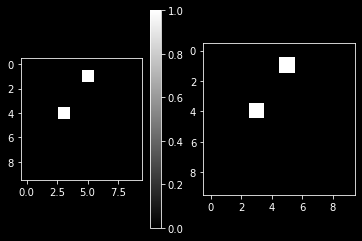

In [41]:
a = np.ones((10,10),dtype=np.int16)
np.random.seed(1)
# b = np.random.uniform(low=0,high=255,size=(10,10))
b = np.ones((10,10),dtype=np.uint16)
b[1,5]=0
b[4,3]=0
b[5,5]=5
c = a-np.minimum(a,b)
d = a-b
d[d<0]=0

fig,ax = plt.subplots(1,2)

t= ax[0].imshow(c, cmap='gray')

tt = ax[1].imshow(d, cmap='gray')
fig.colorbar(tt,ax=ax[0])
filepath = r'C:\Users\yoshi\Desktop\test'
file_name =  'test'+'.tif'
file_save = os.path.join(filepath,file_name)
# tifffile.imwrite(file_save,a.astype(np.uint16))

### Read TIFF FILE

In [1]:
import tifffile
import zarr

main_folder =r'D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_50' #5 great to see all the neurons.
processed_files = main_folder + '/'+'processed_files'

In [2]:
### For preexisting tiff saved datasets
filename = 'aligned_stack.ome.tif'
filepath_save = os.path.join(processed_files,filename)
tiff_stack = tifffile.imread(filepath_save)

##Saving to ZARR
zarr_file = 'aligned_stack' + '.zarr'
zarr_file_save = os.path.join(processed_files,zarr_file)
print(zarr_file_save)
zarr.save(zarr_file_save,tiff_stack)

D:\Data\MBL_ED_ANTONE\oh15265_2\20220509_M25_oh15265_50/processed_files\aligned_stack.zarr


### ZARR IMPORT

In [12]:
main_folder = r'H:\Test\20220504_M25_celegansOH_late1'
file_name = main_folder + '/'+'deconvolved_worm' + '.zarr'
zarr_stack = zarr.load(file_name)
da_stack_deconvolved = da.from_array(zarr_stack)
